# A-star algorithm Implementation for Graph traversal

In [ ]:
# heuristic function with equal values for all nodes
def h(self, n):
    H = {
        'A': 1,
        'B': 7,
        'C': 7,
        'D': 1
    }

    return H[n]
    # return 1

In [ ]:
def a_star_algorithm(self, start_node, stop_node):
    open_list = set([start_node])
    closed_list = set([])

    g = {}

    g[start_node] = 0

    # parents contains an adjacency map of all nodes
    parents = {}
    parents[start_node] = start_node

    while len(open_list) > 0:
        n = None

        # find a node with the lowest value of f() - evaluation function
        for v in open_list:
            if n == None or g[v] + self.h(v) <= g[n] + self.h(n):
                n = v;

        if n == None:
            print('Path does not exist!')
            return None

        # if the current node is the stop_node
        # then we begin reconstructin the path from it to the start_node
        if n == stop_node:
            reconst_path = []

            while parents[n] != n:
                reconst_path.append(n)
                n = parents[n]

            reconst_path.append(start_node)

            reconst_path.reverse()

            print('Path found: {}'.format(reconst_path))
            return reconst_path

        # for all neighbors of the current node do
        for (m, weight) in self.get_neighbors(n):
            # if the current node isn't in both open_list and closed_list
            # add it to open_list and note n as it's parent
            if m not in open_list and m not in closed_list:
                open_list.add(m)
                parents[m] = n
                g[m] = g[n] + weight

            # otherwise, check if it's quicker to first visit n, then m
            # and if it is, update parent data and g data
            # and if the node was in the closed_list, move it to open_list
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n

                    if m in closed_list:
                        closed_list.remove(m)
                        open_list.add(m)

        # remove n from the open_list, and add it to closed_list
        # because all of his neighbors were inspected
        open_list.remove(n)
        closed_list.add(n)

    print('Path does not exist!')
    return None

# cost(a) =
# loop1:
#     b,1: open(b)
#         parent[b] = a
#         cost(b) 1
# 2    c,3: open(b,c)
#         parent[c] = a
#         cost(c) 3
# 3    d,7: open(b,c,d)
#         parent[d] = a
#         cost(d) 7
#closed list = (a)
# run2: b node
# loop1: d,5

#         cost(d) 6
#         parent[d] = b


In [ ]:
class Graph:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]


Graph.h = h
Graph.a_star_algorithm = a_star_algorithm

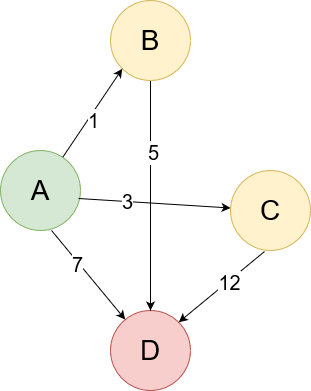

In [ ]:
adjacency_list = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}

graph1 = Graph(adjacency_list)
graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'B', 'D']


['A', 'B', 'D']